# Chapter 2 - Statistical Learning


This notebook presents the Python implementation of exercises from the book *"Introduction to Statistical Learning"* (a.k.a. ISLR) by Gareth James et al.

---

## Applied Exercises

##  Question 8

**Dataset**: College.csv; contains a number of variables for 777 different universities and colleges in the US.

**Variables**:
* Private: Public/private indicator
* Apps: Number of applications received
* Accept: Number of applicants accepted
* Enroll: Number of new students enrolled
* Top10perc: New students from top 10% of high school class
* Top25perc: New students from top 25% of high school class
* F.Undergrad: Number of full-time undergraduates
* P.Undergrad : Number of part-time undergraduates
* Outstate : Out-of-state tuition
* Room.Board : Room and board costs
* Books : Estimated book costs
* Personal : Estimated personal spending
* PhD : Percent of faculty with Ph.D.’s
* Terminal : Percent of faculty with terminal degree
* S.F.Ratio : Student/faculty ratio
* perc.alumni : Percent of alumni who donate
* Expend : Instructional expenditure per student
* Grad.Rate : Graduation rate

In [180]:
# Import dependencies and setup notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_palette('tab10')
sns.set_style('whitegrid')
%matplotlib inline

In [181]:
# Read in the data and check its head
college = pd.read_csv('data/ISLR/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [182]:
# Check the column names
college.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [183]:
# Re-read the data, assigning the first column as the index for each row
college = pd.read_csv('data/ISLR/College.csv', index_col=0)

# Verify that the first column has been assigned as the index
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [184]:
# Produce a general summary of the data 
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [185]:
# Produce a summary of the numerical variables in the data
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [225]:
# Produce a summary of the categorical variable, Private
college['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

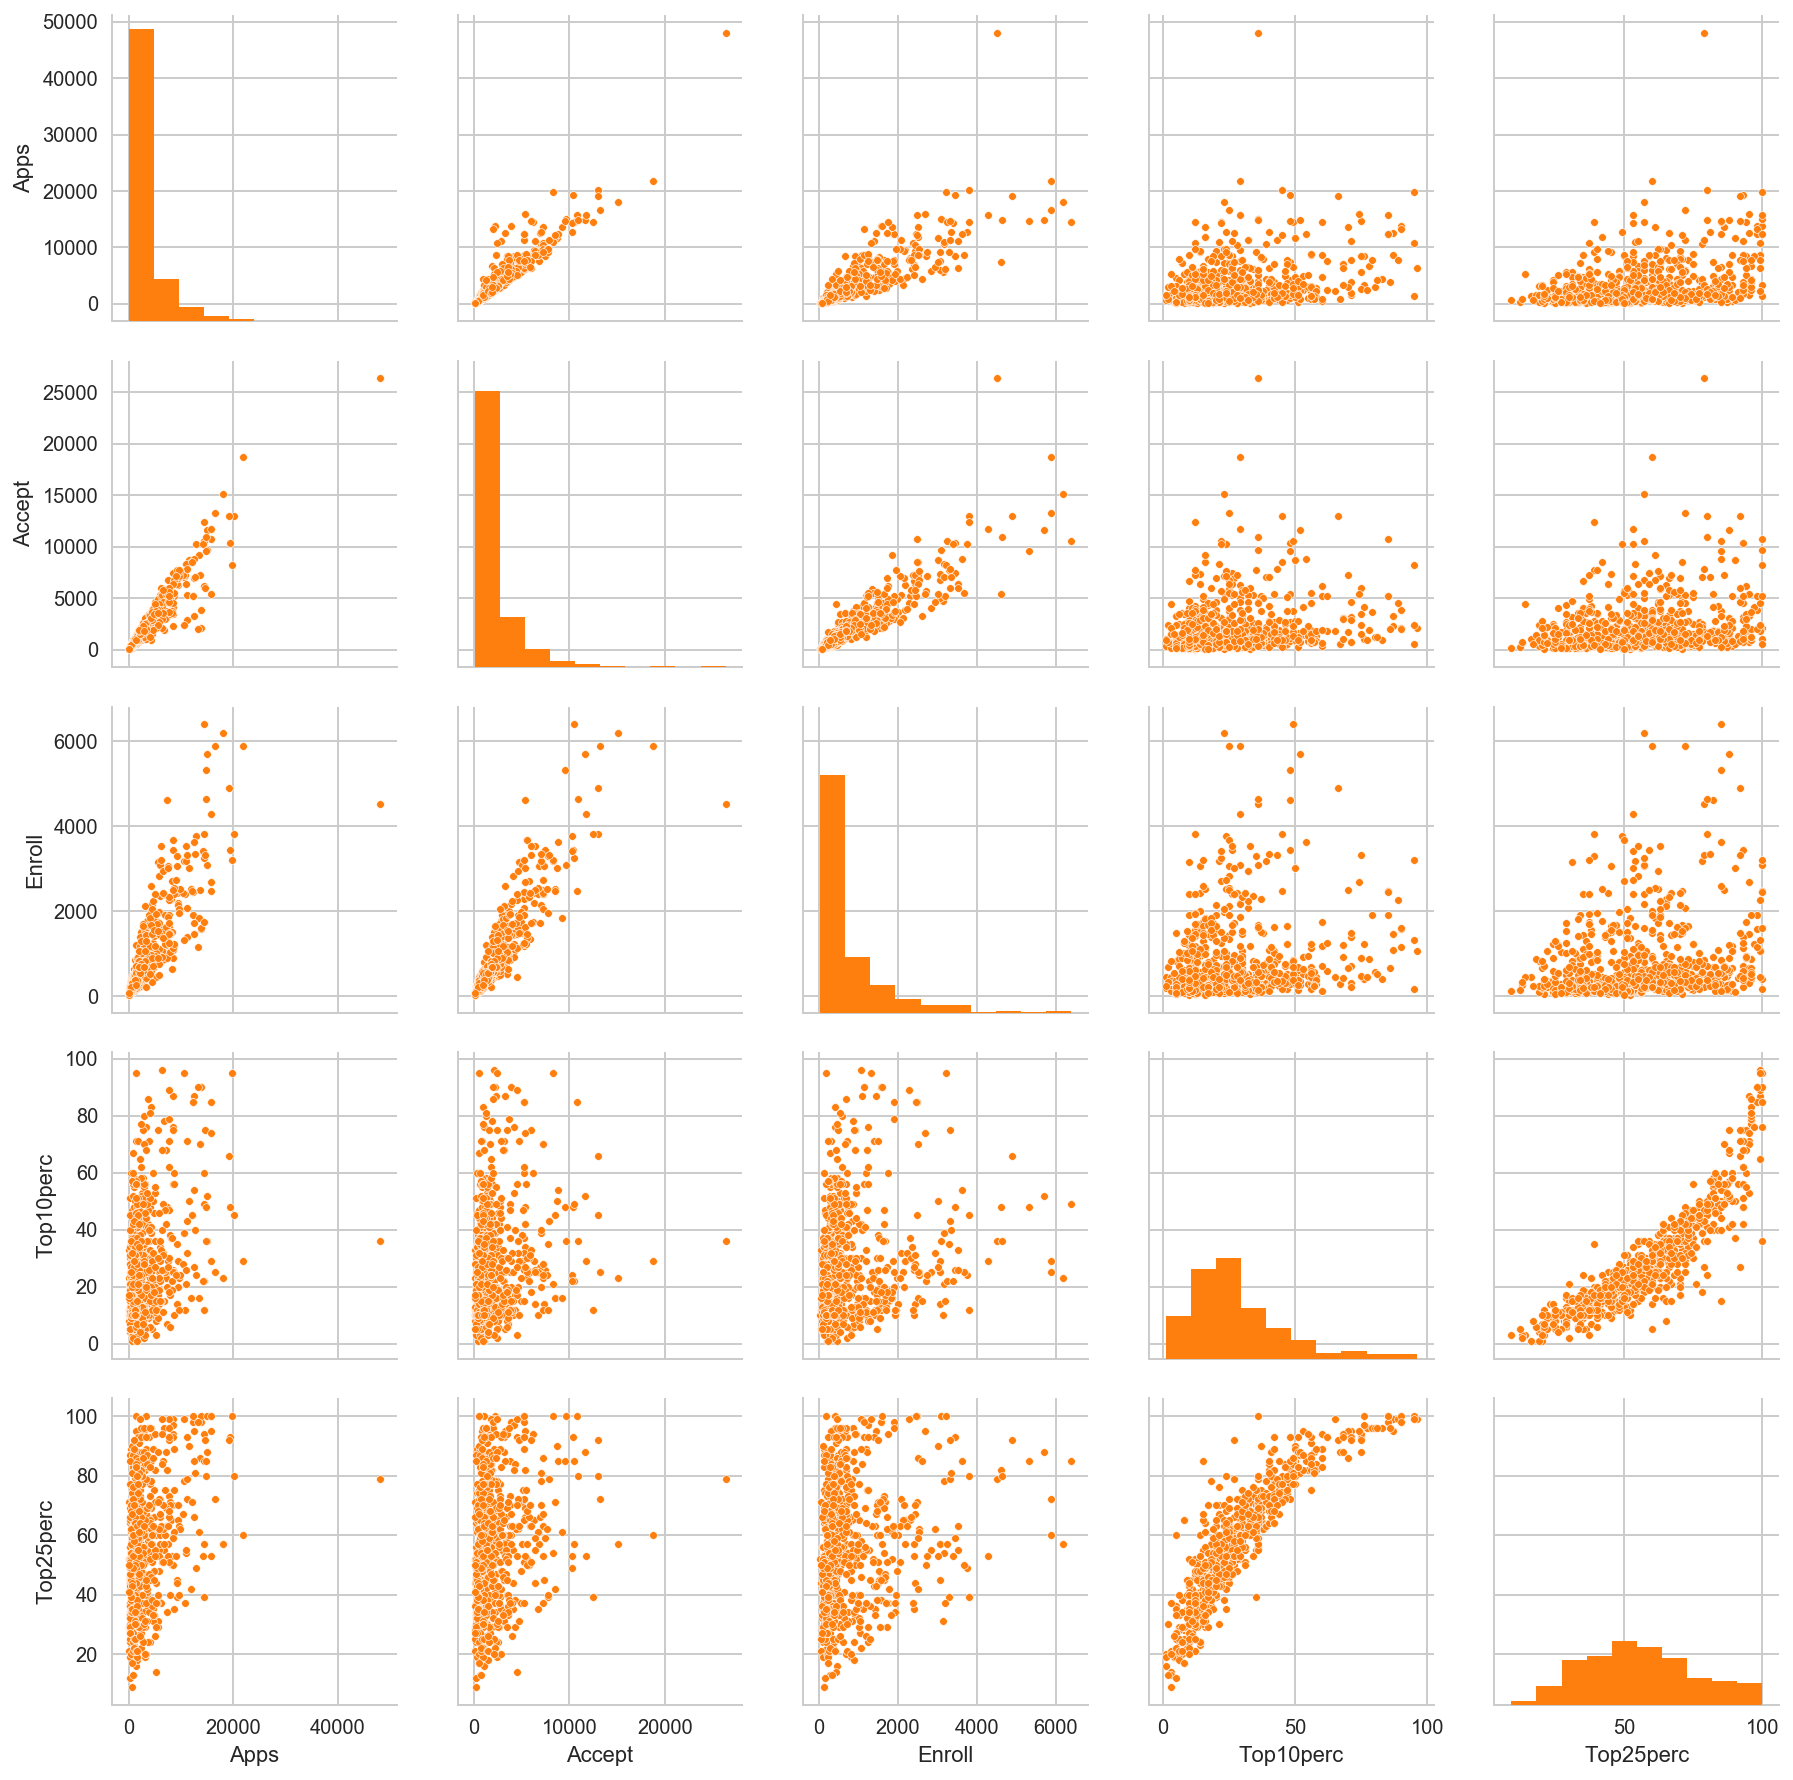

In [264]:
# Produce a scatterplot matrix of the first ten columns of the data
sns.pairplot(data=college[college.columns[0:6]], plot_kws={'s':15})

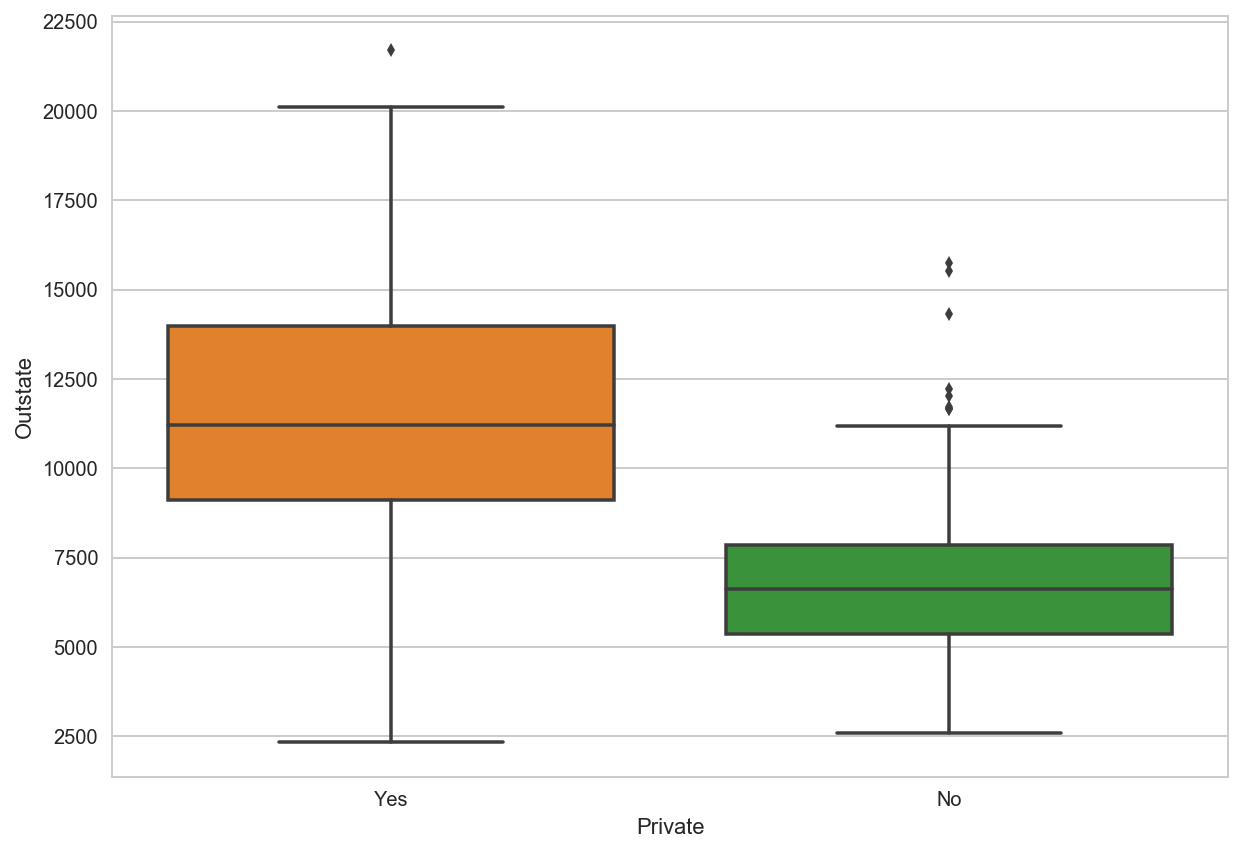

In [188]:
# Produce side-by-side boxplots of Outstate versus Private
plt.figure(figsize=(10, 7))
sns.boxplot(data=college, x='Private', y='Outstate')

In [189]:
# Create a new qualitative variable, Elite, by binning the Top10perc variable
# Assign 'Yes' if Top10perc > 50, 'No' otherwise
college['Elite'] = np.where(college['Top10perc'] > 50, 'Yes', 'No')

In [190]:
# Check number of elite universities
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

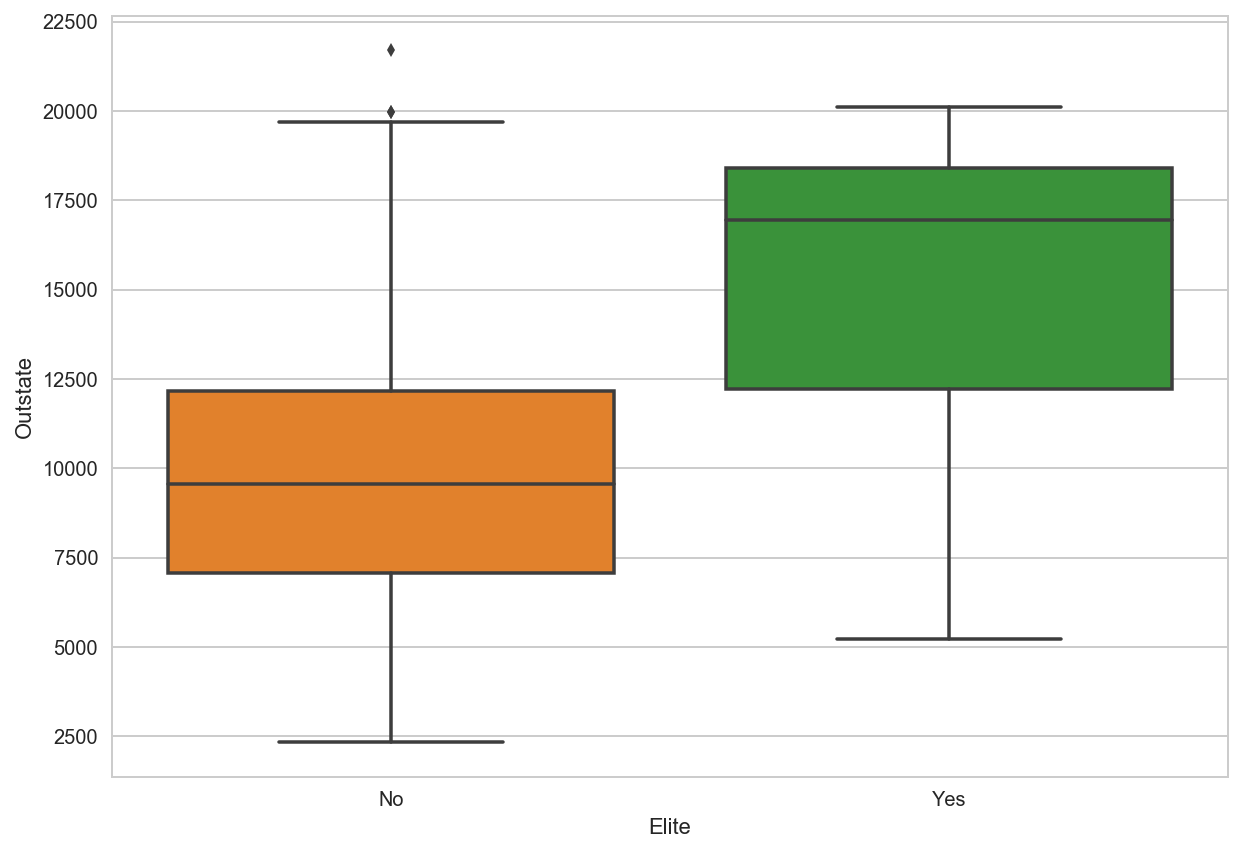

In [191]:
# Prduce side-by-side boxplots of Outstate versus Elite
plt.figure(figsize=(10, 7))
sns.boxplot(data=college, x='Elite', y='Outstate')

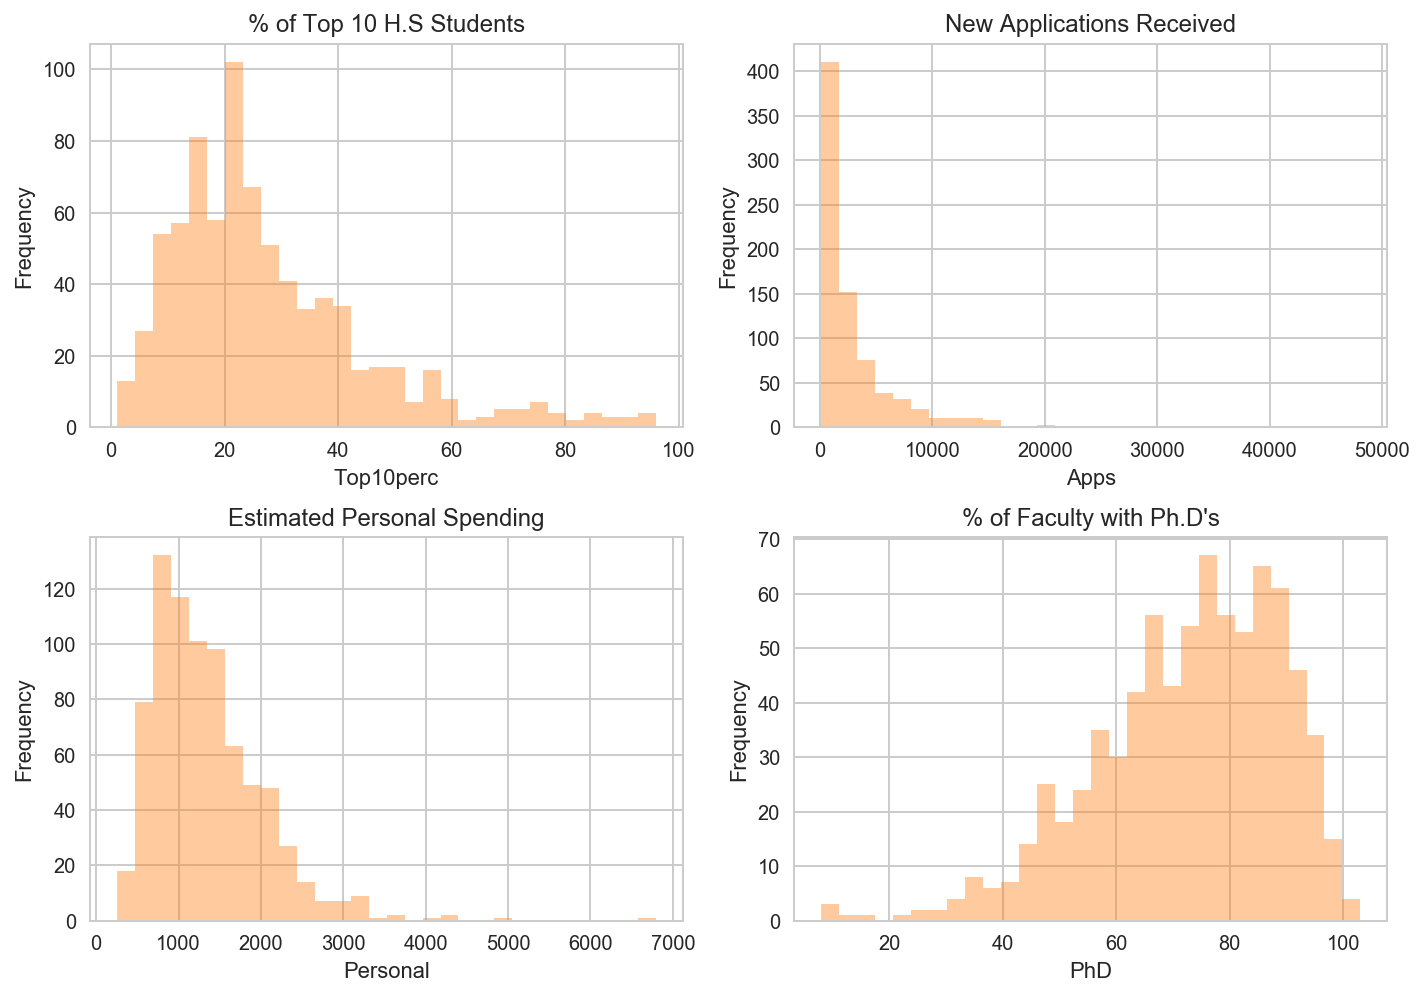

In [192]:
# Produce histograms for the variables Top10perc, Apps, Personal, and PhD
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,7))

topleft = ax[0][0]
topright = ax[0][1]
bottomleft = ax[1][0]
bottomright = ax[1][1]

sns.distplot(college['Top10perc'].values, kde=False, ax=topleft, bins=30)
topleft.set_title('% of Top 10 H.S Students')
topleft.set_xlabel('Top10perc')
topleft.set_ylabel('Frequency')

sns.distplot(college['Apps'].values, kde=False, ax=topright, bins=30)
topright.set_title('New Applications Received')
topright.set_xlabel('Apps')
topright.set_ylabel('Frequency')

sns.distplot(college['Personal'].values, kde=False, ax=bottomleft, bins=30)
bottomleft.set_title('Estimated Personal Spending')
bottomleft.set_xlabel('Personal')
bottomleft.set_ylabel('Frequency')

sns.distplot(college['PhD'].values, kde=False, ax=bottomright, bins=30)
bottomright.set_title('% of Faculty with Ph.D\'s')
bottomright.set_xlabel('PhD')
bottomright.set_ylabel('Frequency')

plt.tight_layout()

---
## Question 9

**Dataset**: Auto.csv; A data frame with 392 observations on the following 9 variables.

**Variables**:

* mpg: miles per gallon
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name

In [202]:
# Read in the data
auto = pd.read_csv('data/ISLR/Auto.csv', index_col=0)

#### Quickly explore the data

In [198]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [210]:
# Produce general summary of data
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


#### The data appears to have one categorical variable; *name*

In [241]:
# Produce summary for numerical variables
# Since variables 'cylinders' , 'origin' and 'year' are categorical in nature, they are ommitted
auto.drop(['cylinders', 'origin', 'year'], axis=1).describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


#### It appears that *cylinders* and *origin* are not continuous variables

In [209]:
# Retreive 10 most common values for 'name'
auto['name'].value_counts().head(10)

toyota corolla        5
amc matador           5
ford pinto            5
amc hornet            4
chevrolet impala      4
peugeot 504           4
toyota corona         4
amc gremlin           4
ford maverick         4
chevrolet chevette    4
Name: name, dtype: int64

#### Create a heatmap to quickly scan for any missing values

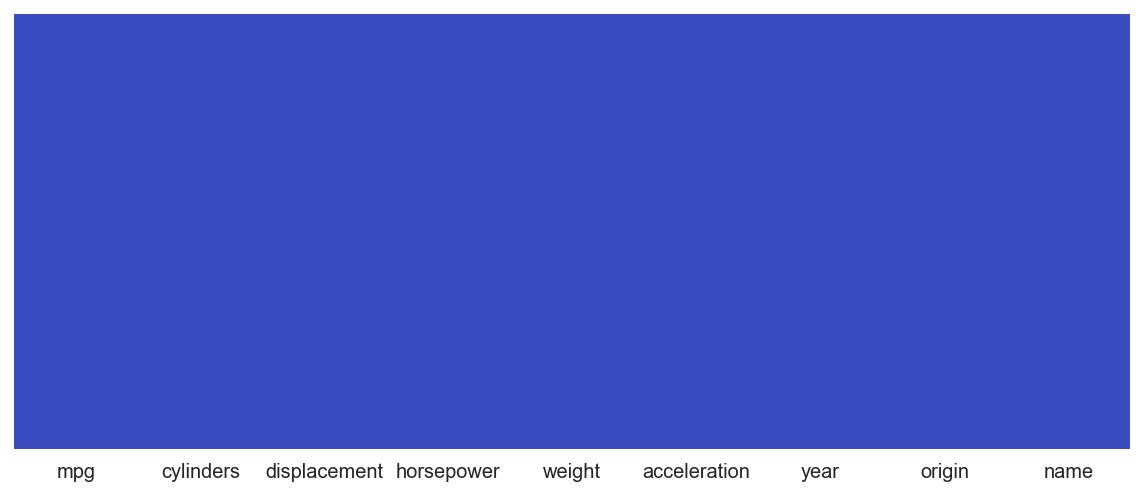

In [222]:
# Any red will indicate missing values
plt.figure(figsize=(10, 4))
sns.heatmap(auto.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

#### Investigating the predictors graphically

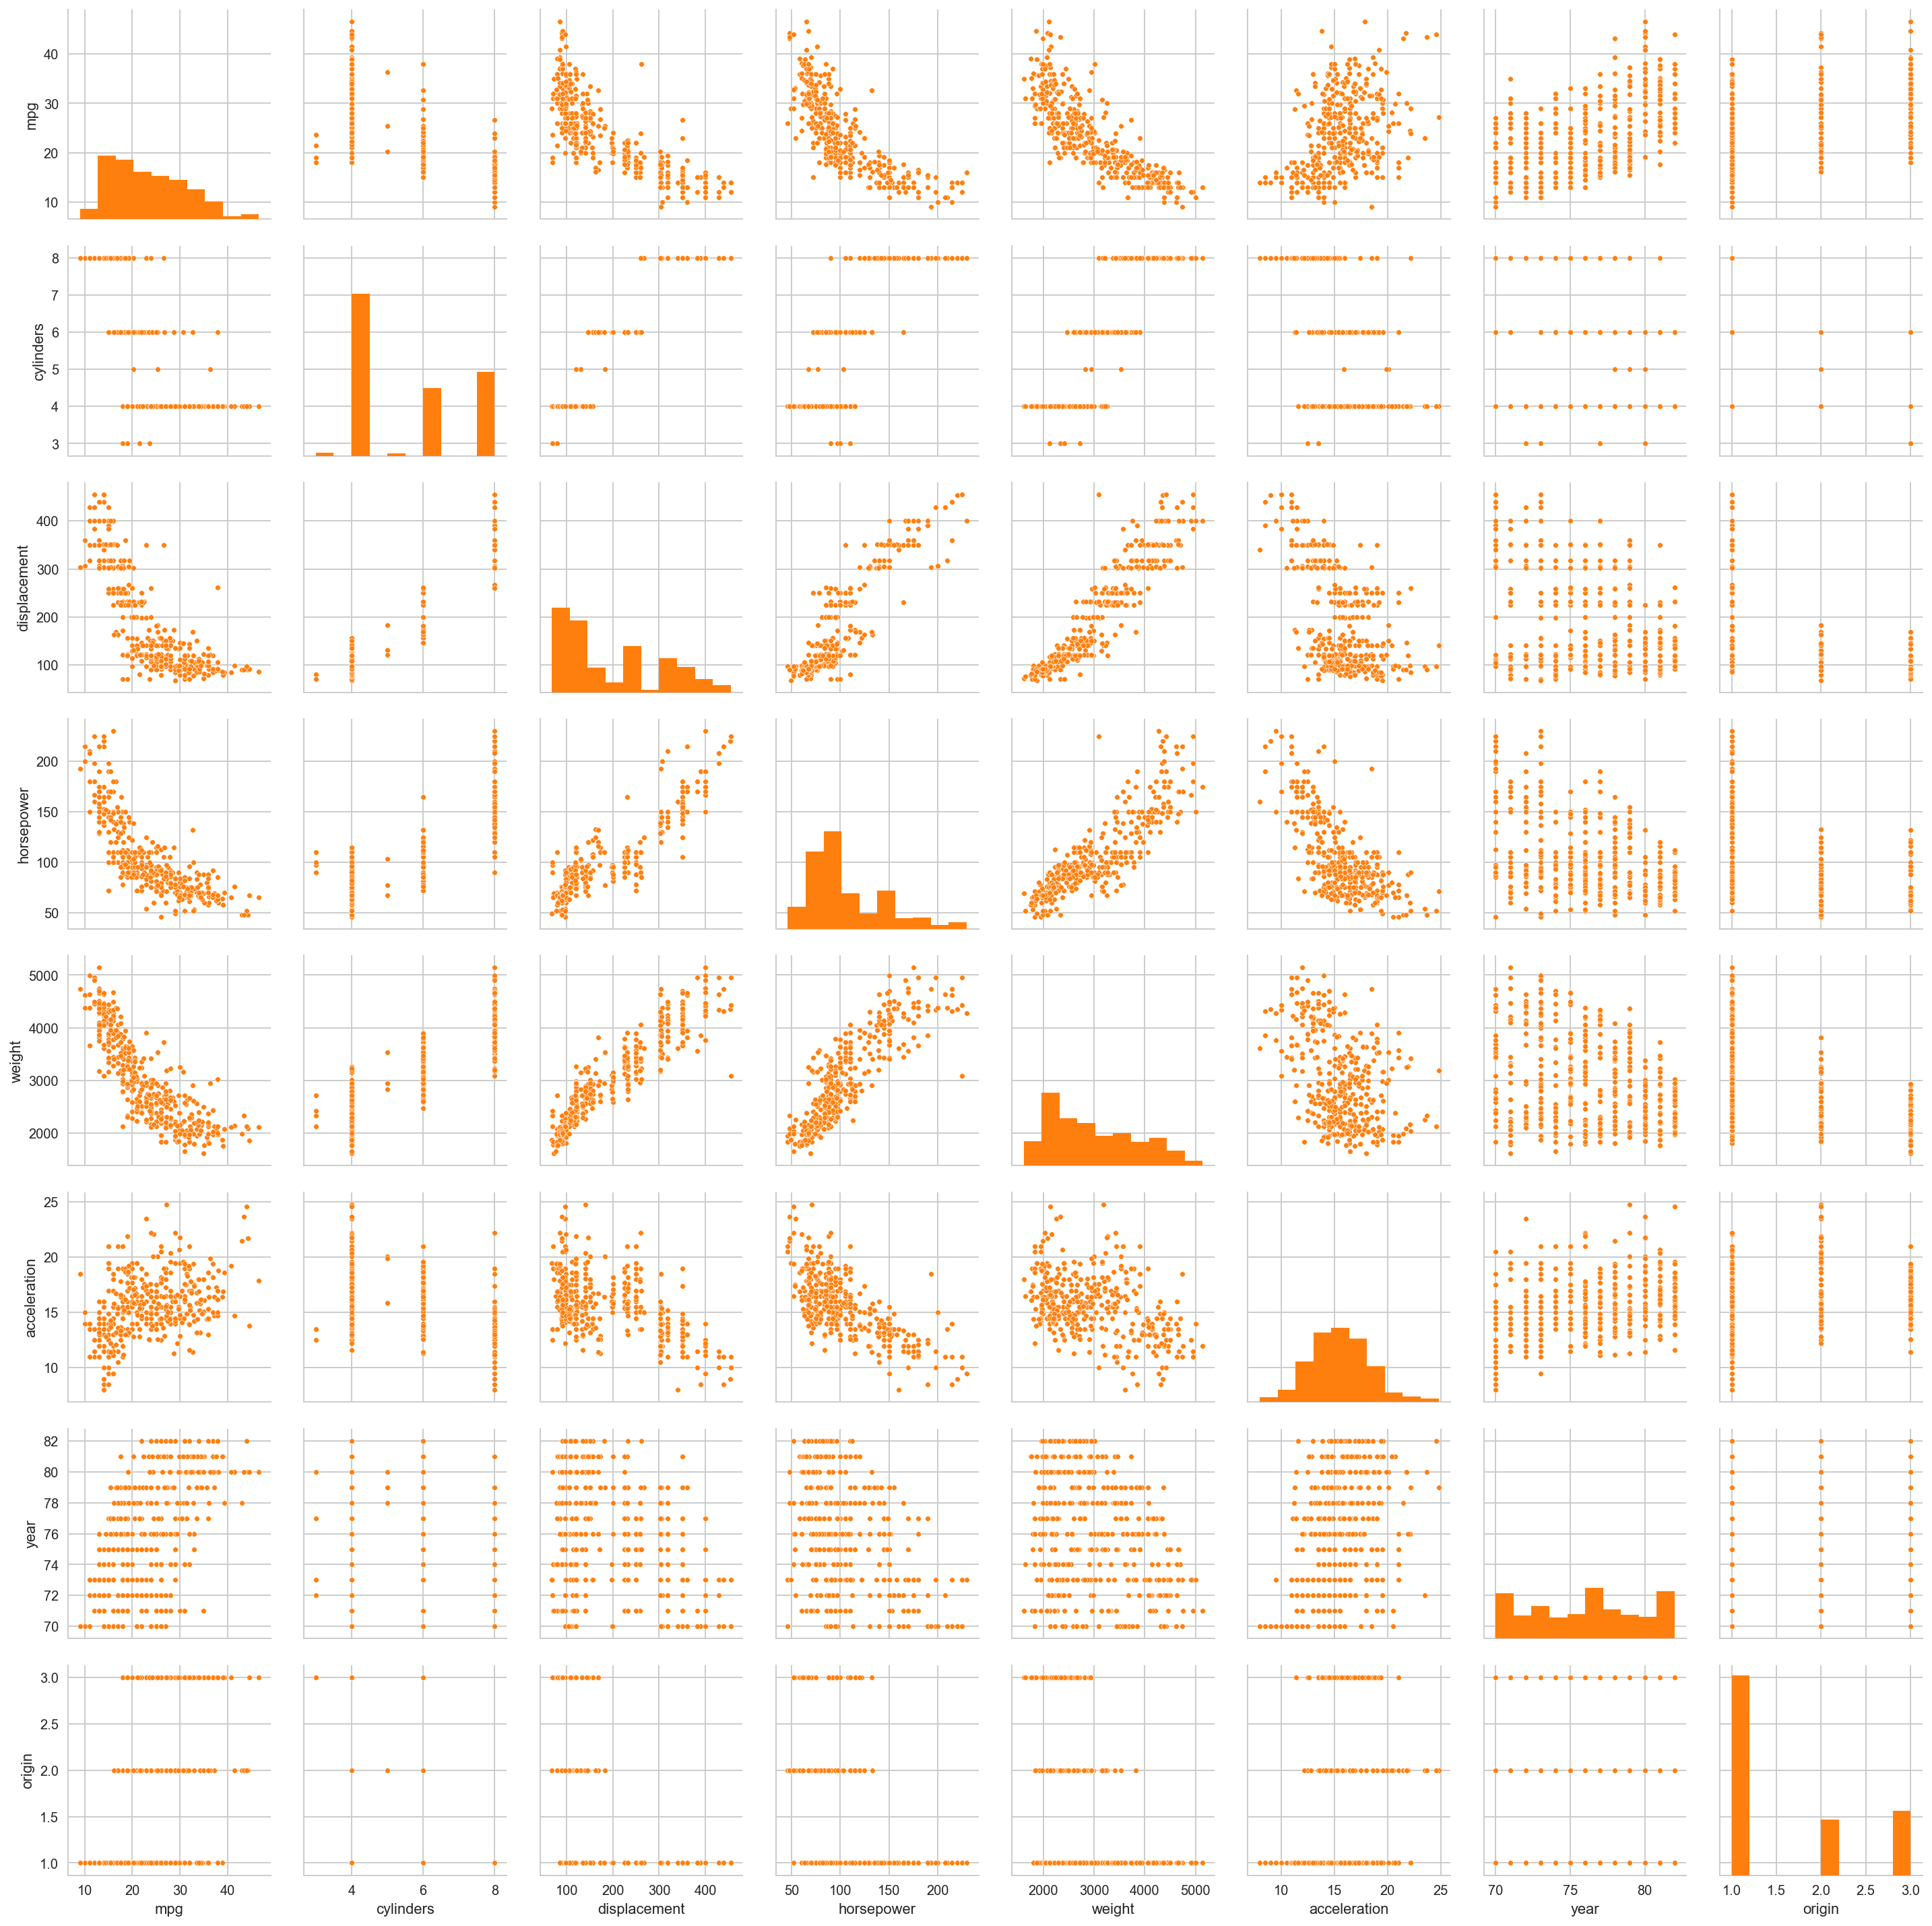

In [263]:
sns.pairplot(auto, plot_kws={'s':15})

#### Suppose that we wish to predict gas mileage (mpg) on the basis of other variables. Do the plots suggest that any of the other variables might be useful in predicting mpg? Why?

> Looking at the first row, it seems evident that there is a high degree of association between 'mpg' and the variables 'displacement', 'horsepower', and 'weight'. The scatter plots between 'mpg' and these variables all display observable patterns. Moreover, categorical variables such as 'cylinders', 'origin' or 'year' also seem to indicate some association with 'mpg' as the level of 'mpg' appears to be quite distinct in each category.

---
## Question 10

**Dataset**: Boston.csv; Housing Values in Suburbs of Boston, 506 rows
    
**Variables**:

* crim: per capita crime rate by town.
* zn: proportion of residential land zoned for lots over 25,000 sq.ft.
* indus: proportion of non-retail business acres per town.
* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* nox: nitrogen oxides concentration (parts per 10 million).
* rm: average number of rooms per dwelling.
* age: proportion of owner-occupied units built prior to 1940.
* dis: weighted mean of distances to five Boston employment centres.
* rad: index of accessibility to radial highways.
* tax: full-value property-tax rate per \$10,000.
* ptratio: pupil-teacher ratio by town.
* black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* lstat: lower status of the population (percent).
* medv: median value of owner-occupied homes in \$1000s.

#### Read in the data and quickly explore it

In [244]:
boston = pd.read_csv('data/MASS/Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [245]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [249]:
# variables 'chas' and 'rad' are categorical, so omit them in generating numerical variables summary
boston.drop(['chas', 'rad'], axis=1).describe()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


#### I want to find out what factors are associated with the home values in Boston. For instance, I want to find out if/how it is related to factors such as crime rate, proximity of industry, number of rooms, property tax rate, etc.

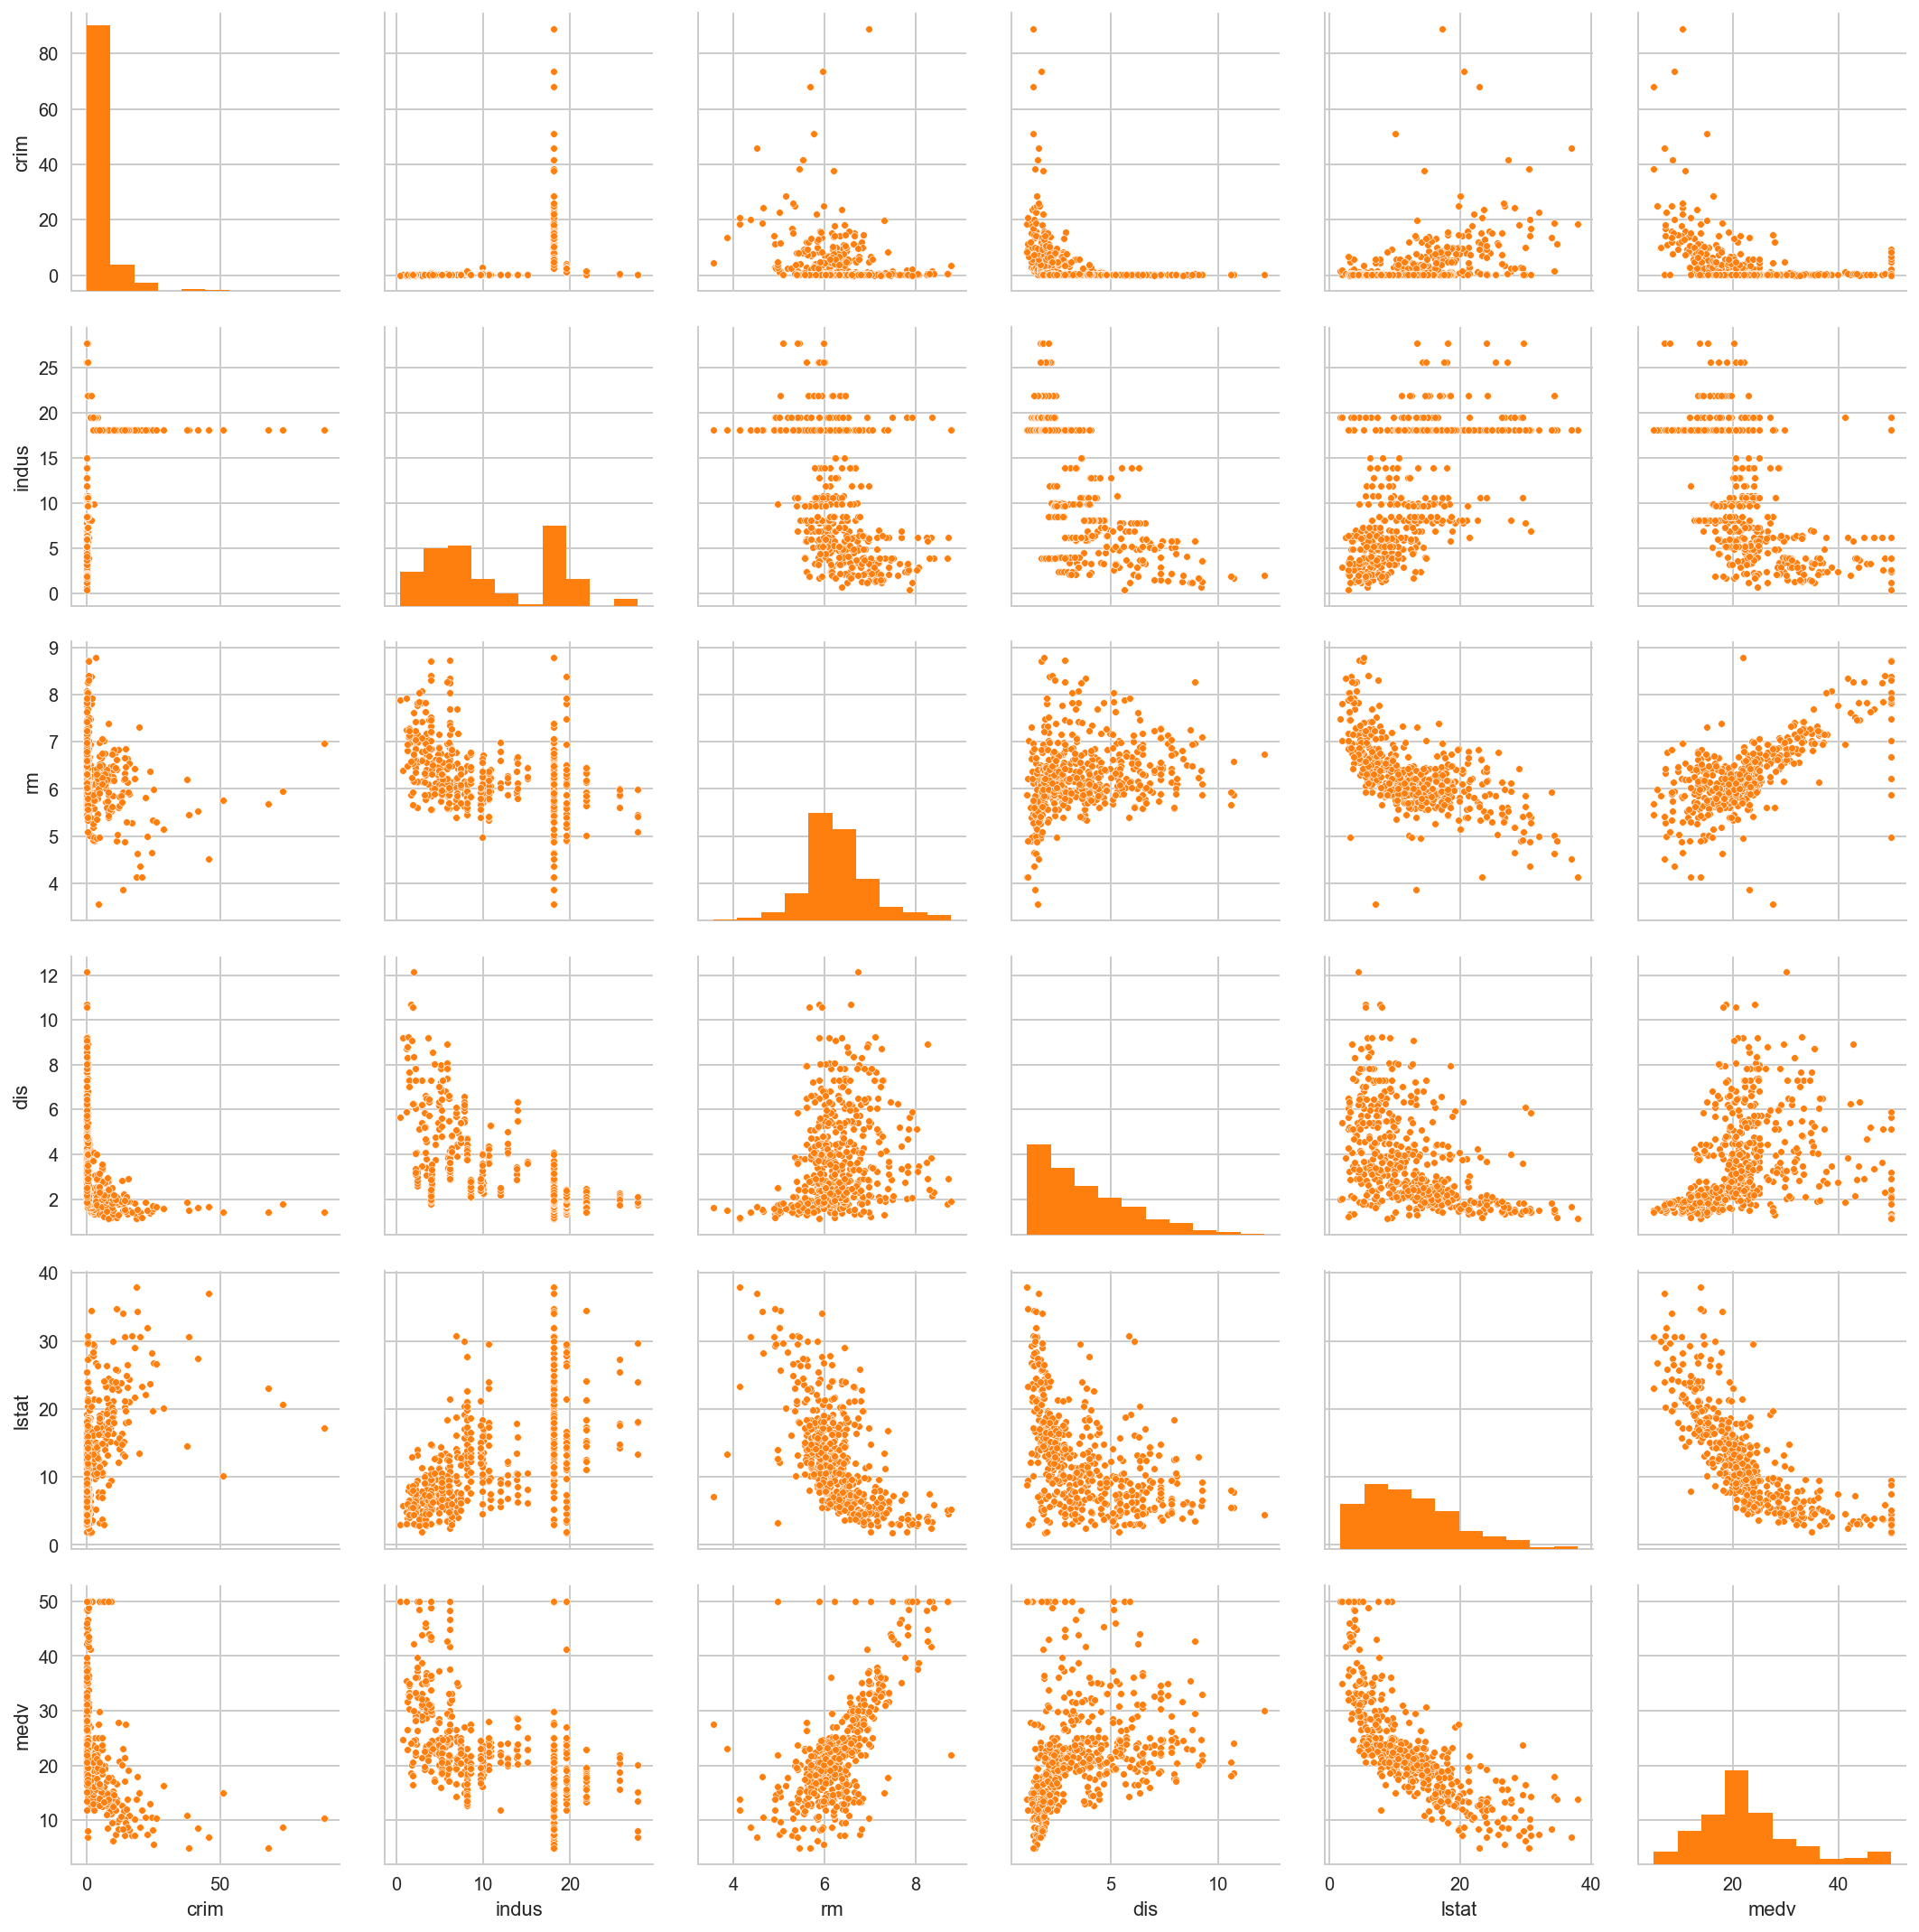

In [265]:
cols = ['crim', 'indus', 'rm', 'dis', 'lstat', 'medv']
# Produce pairwise scatterplots of some predictors
sns.pairplot(boston[cols], plot_kws={'s':15})

#### Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

> It appears that the per capita crime rate is positively associated with the percentage of lower status people in the population. Also, it appears that the crime rate is negatively associated with the home values.

#### To further verify the above observation, plot correlation matrix of variables

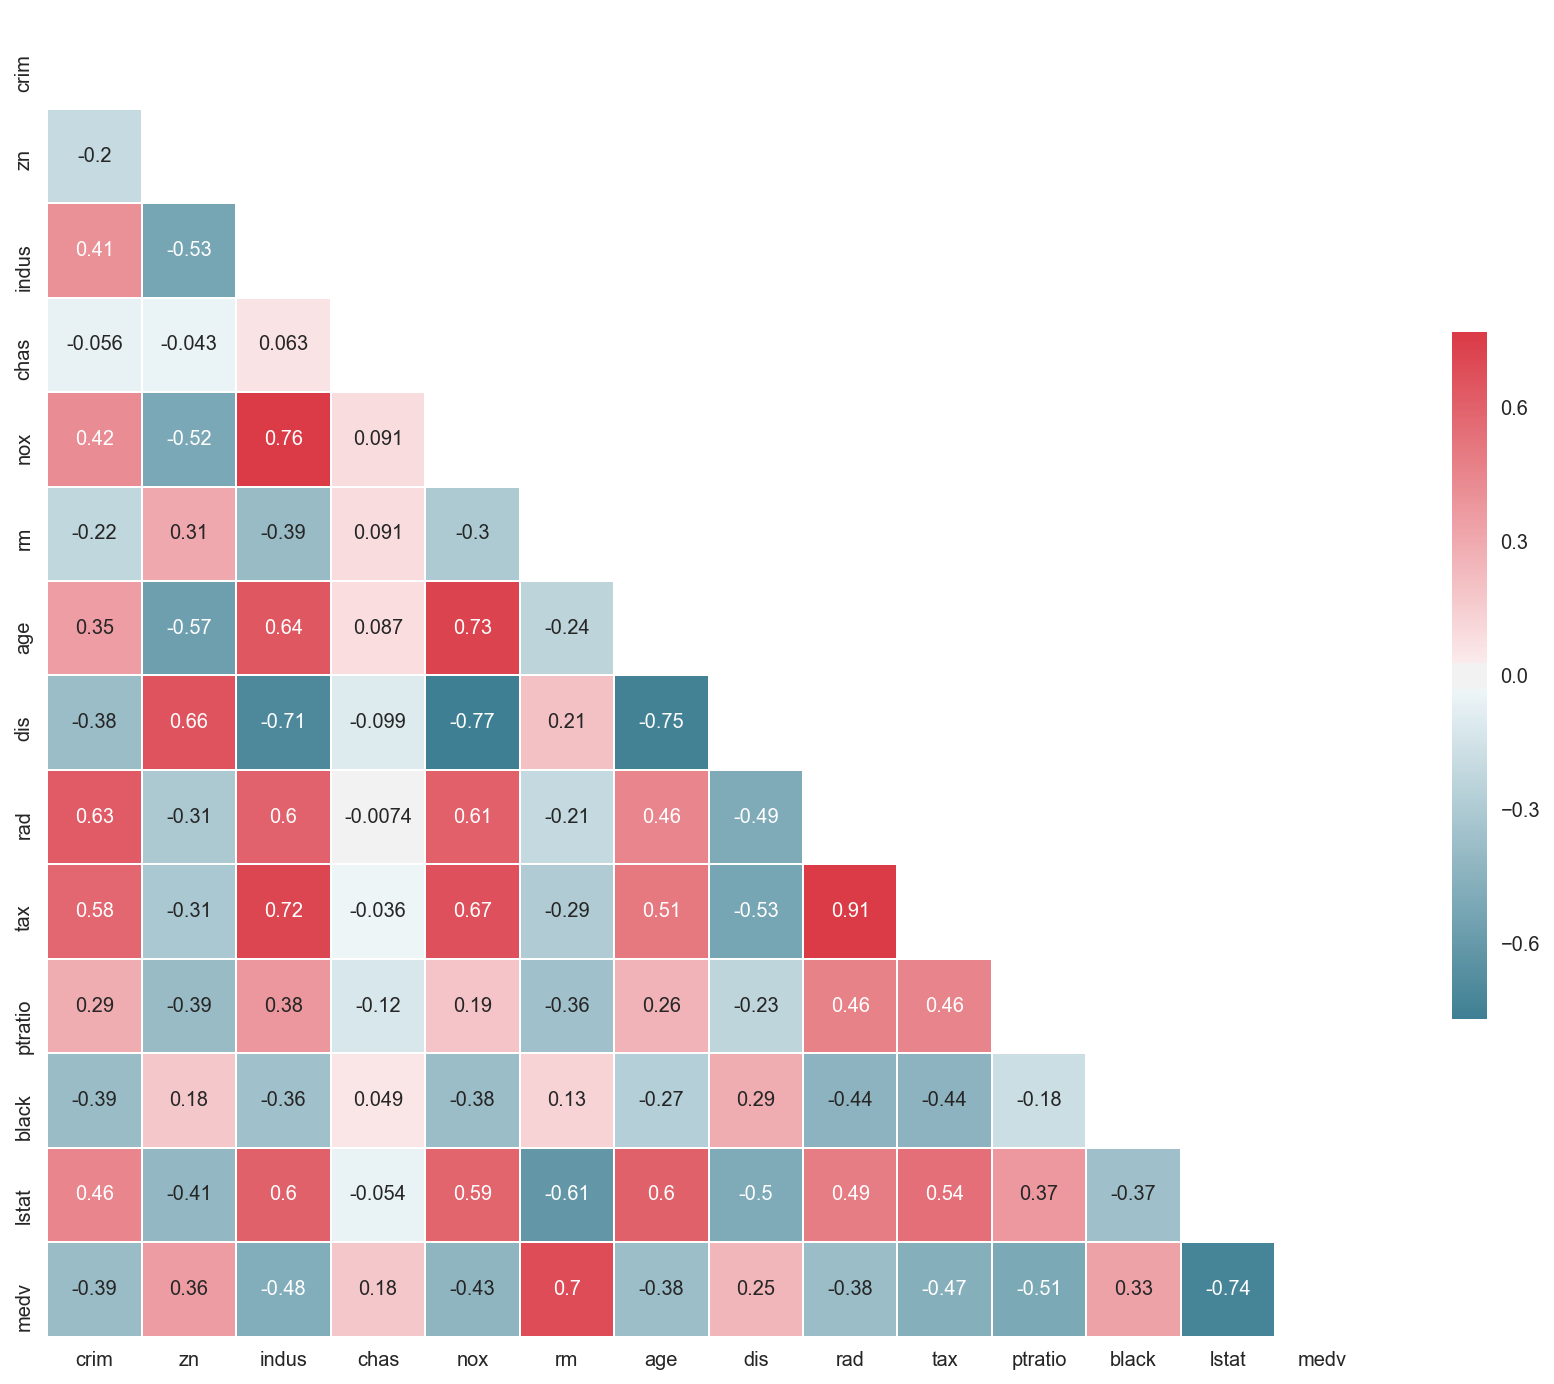

In [284]:
corr = boston.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

> The correlation matrix verifies the previous observation that *lstat* is highly positively correlated with *crim*. Moreover, the matrix reveals that *rad*, which is the distance to radial highway is also highly positively correlated with per capita crime rate.

### Misc.

In [288]:
# How many of the suburbs in the data bound the Charles river?
boston['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

Since 1 denotes boundary by the river and 0 otherwise, 35 suburbs are bound by the river.

In [289]:
# What is the median pupil-teacher ratio among the towns in the data?
boston['ptratio'].median()


19.05